# Introducción a Pandas

Tomado del material de la catedra DSS de [Celia Cintas](https://github.com/celiacintas)

In [10]:
from IPython.display import IFrame 
IFrame('http://pandas.pydata.org/', width=1000, height=350)

In [11]:
import pandas as pd
import numpy as np

#### Cómo cargar y guardar datos desde diferentes fuentes ?

In [12]:
df_txt = pd.read_csv("data/medidas.txt", header=None, parse_dates=[1], keep_date_col=True)
#df_txt = pd.read_csv('data/all_test.txt', sep='\t', header=None)
df_txt


,0,1,2
0,8,2013-11-28 11:00:00,0
1,15,2013-11-28 11:00:00,692
2,16,2013-11-28 11:00:00,367
3,17,2013-11-28 11:00:00,0
4,18,2013-11-28 11:00:00,0
5,20,2013-12-01 09:30:00,71
6,6,2013-12-05 15:45:00,0
7,5,2013-11-18 22:15:00,29705
8,6,2013-11-18 22:15:00,15364
9,7,2013-11-18 22:15:00,41482


In [6]:
df_txt.shape

(129721, 3)

### Cargando datos desde archivos Excel
Es necesario el paquete `xlrd`, para instalarlo: `conda install -y xlrd`, y fuera del entorno Anaconda, con la línea: `pip install xlrd`.

In [14]:
df_other_excel = pd.read_excel('data/test.xls', 'Sheet0') # ver que sucede cuando ponemos header None
print(df_other_excel.columns)


Index(['Fecha', 'Evento', 'Domicilio', 'Localidad', 'Latitud', 'Longitud',
       'Cantidad Ambulancias', 'Ambulancia', 'Derivación',
       'Atenciones en Lugar', 'Derivaciones a Hospital'],
      dtype='object')


In [15]:
df_other_excel['Latitud'].apply(lambda x: x.replace(',', '.'))

0               -38.73008
1               -38.70583
2               -38.74588
3               -38.71933
4               -38.71498
5               -38.72875
6               -38.74818
7               -38.72875
8               -38.71425
9               -38.69112
10              -38.70475
11              -38.75256
12              -38.70533
13      -38.6940002441406
14              -38.67708
15              -38.68735
16              -38.71095
17              -38.71096
18              -38.72744
19              -38.69223
20              -38.74731
21              -38.75501
22              -38.72717
23              -38.70318
24              -38.71692
25              -38.73853
26              -38.70213
27              -38.72409
28              -38.75764
29               -38.7292
              ...        
6330            -38.70954
6331            -38.71064
6332            -38.78465
6333            -38.70511
6334            -38.72084
6335            -38.70983
6336            -38.69252
6337        

In [16]:
df_other_excel.shape

(6360, 11)

### Otros métodos de carga de Pandas

In [27]:
for nombre in dir(pd):
    if nombre.startswith('read_'):
        print("* ", nombre)

*  read_clipboard
*  read_csv
*  read_excel
*  read_fwf
*  read_gbq
*  read_hdf
*  read_html
*  read_json
*  read_msgpack
*  read_pickle
*  read_sas
*  read_sql
*  read_sql_query
*  read_sql_table
*  read_stata
*  read_table


In [ ]:
#df_tx.to_excel('data/test_out.xls', header=False, index=False) # cuidado con límites de planillas de excel!

### Y metodos de salida

In [29]:
for nombre in dir(df_txt):
    if nombre.startswith('to_'):
        print("* ", nombre)

*  to_clipboard
*  to_csv
*  to_dense
*  to_dict
*  to_excel
*  to_gbq
*  to_hdf
*  to_html
*  to_json
*  to_latex
*  to_msgpack
*  to_panel
*  to_period
*  to_pickle
*  to_records
*  to_sparse
*  to_sql
*  to_stata
*  to_string
*  to_timestamp
*  to_wide
*  to_xarray


## Conociendo las estructuras de Pandas

#### Series

In [31]:
mi_serie = pd.Series([3.4, 56.3, 56.1])
print(mi_serie.values)
print(mi_serie.index)
mi_serie

[  3.4  56.3  56.1]
RangeIndex(start=0, stop=3, step=1)


0     3.4
1    56.3
2    56.1
dtype: float64

In [32]:
mi_serie = pd.Series([3.4, 56.3, 56.1], index=['dist_1', 'dist_2', 'dist_3'])
print(mi_serie.values)
print(mi_serie.index)
print(mi_serie['dist_2'])
print(mi_serie[['dist_1', 'dist_3']])
mi_serie

[  3.4  56.3  56.1]
Index(['dist_1', 'dist_2', 'dist_3'], dtype='object')
56.3
dist_1     3.4
dist_3    56.1
dtype: float64


dist_1     3.4
dist_2    56.3
dist_3    56.1
dtype: float64

### Operaciones con Series

In [33]:
mi_serie[mi_serie > 4]

dist_2    56.3
dist_3    56.1
dtype: float64

In [34]:
mi_serie * 2

dist_1      6.8
dist_2    112.6
dist_3    112.2
dtype: float64

In [35]:
np.sqrt(mi_serie)

dist_1    1.843909
dist_2    7.503333
dist_3    7.489993
dtype: float64

In [36]:
pd.notnull(mi_serie)

dist_1    True
dist_2    True
dist_3    True
dtype: bool

In [37]:
pd.isnull(mi_serie)

dist_1    False
dist_2    False
dist_3    False
dtype: bool

### Series Temporales

In [38]:
dates_complete = pd.date_range('1/18/2013', '02/09/2014', freq='15T')
other_dates = pd.date_range('1/18/2013', '02/09/2014', freq='1D')
print(dates_complete)
print(other_dates)
mi_serie = pd.Series(other_dates)
mi_serie_med = pd.Series(dates_complete)


DatetimeIndex(['2013-01-18 00:00:00', '2013-01-18 00:15:00',
               '2013-01-18 00:30:00', '2013-01-18 00:45:00',
               '2013-01-18 01:00:00', '2013-01-18 01:15:00',
               '2013-01-18 01:30:00', '2013-01-18 01:45:00',
               '2013-01-18 02:00:00', '2013-01-18 02:15:00',
               ...
               '2014-02-08 21:45:00', '2014-02-08 22:00:00',
               '2014-02-08 22:15:00', '2014-02-08 22:30:00',
               '2014-02-08 22:45:00', '2014-02-08 23:00:00',
               '2014-02-08 23:15:00', '2014-02-08 23:30:00',
               '2014-02-08 23:45:00', '2014-02-09 00:00:00'],
              dtype='datetime64[ns]', length=37153, freq='15T')
DatetimeIndex(['2013-01-18', '2013-01-19', '2013-01-20', '2013-01-21',
               '2013-01-22', '2013-01-23', '2013-01-24', '2013-01-25',
               '2013-01-26', '2013-01-27',
               ...
               '2014-01-31', '2014-02-01', '2014-02-02', '2014-02-03',
               '2014-02-04', '2

#### DataFrames

In [39]:
type(df_other_excel)

pandas.core.frame.DataFrame

In [40]:
df_other_excel

,Fecha,Evento,Domicilio,Localidad,Latitud,Longitud,Cantidad Ambulancias,Ambulancia,Derivación,Atenciones en Lugar,Derivaciones a Hospital
0,2014-01-01 00:12:59,ATENCION MEDICA EN DOMICILIOS,NEWTON 1800,BAHIA BLANCA,"-38,73008","-62,23579",NaN,NaN,NaN,NaN,NaN
1,2014-01-01 02:16:00,ACCIDENTE DE TRANSITO,TERRADA esq. 17 DE MAYO,BAHIA BLANCA,"-38,70583","-62,29642",NaN,NaN,NaN,NaN,NaN
2,2014-01-01 03:08:40,ACCIDENTE DE TRANSITO,CASEROS 3300,BAHIA BLANCA,"-38,74588","-62,22757",NaN,NaN,NaN,NaN,NaN
3,2014-01-01 03:10:06,ATENCION MEDICA EN VIA PUBLICA,CATAMARCA 1500,BAHIA BLANCA,"-38,71933","-62,30212",NaN,NaN,NaN,NaN,NaN
4,2014-01-01 03:29:06,ACCIDENTE DE TRANSITO,DR ADRIAN MORADO VERES esq. JUJUY,BAHIA BLANCA,"-38,71498","-62,31009",NaN,NaN,NaN,NaN,NaN
5,2014-01-01 03:56:44,ATENCION MEDICA EN DOMICILIOS,MATHEU 6000,BAHIA BLANCA,"-38,72875","-62,23798",NaN,NaN,NaN,NaN,NaN
6,2014-01-01 04:12:58,ATENCION MEDICA EN VIA PUBLICA,CNEL VIDAL 9000,BAHIA BLANCA,"-38,74818","-62,28333",NaN,NaN,NaN,NaN,NaN
7,2014-01-01 04:19:14,ATENCION MEDICA EN DOMICILIOS,MATHEU 6000,BAHIA BLANCA,"-38,72875","-62,23798",NaN,NaN,NaN,NaN,NaN
8,2014-01-01 04:21:42,ATENCION MEDICA EN VIA PUBLICA,CORONEL MARTINIANO RODRIGUEZ esq. MITRE,BAHIA BLANCA,"-38,71425","-62,26583",NaN,NaN,NaN,NaN,NaN
9,2014-01-01 05:01:05,ATENCION MEDICA EN VIA PUBLICA,LEOPOLDO LUGONES 0,BAHIA BLANCA,"-38,69112","-62,3053",NaN,NaN,NaN,NaN,NaN


In [41]:
df_other_excel[['Evento', 'Domicilio']]

,Evento,Domicilio
0,ATENCION MEDICA EN DOMICILIOS,NEWTON 1800
1,ACCIDENTE DE TRANSITO,TERRADA esq. 17 DE MAYO
2,ACCIDENTE DE TRANSITO,CASEROS 3300
3,ATENCION MEDICA EN VIA PUBLICA,CATAMARCA 1500
4,ACCIDENTE DE TRANSITO,DR ADRIAN MORADO VERES esq. JUJUY
5,ATENCION MEDICA EN DOMICILIOS,MATHEU 6000
6,ATENCION MEDICA EN VIA PUBLICA,CNEL VIDAL 9000
7,ATENCION MEDICA EN DOMICILIOS,MATHEU 6000
8,ATENCION MEDICA EN VIA PUBLICA,CORONEL MARTINIANO RODRIGUEZ esq. MITRE
9,ATENCION MEDICA EN VIA PUBLICA,LEOPOLDO LUGONES 0


In [42]:
print(df_txt.columns)
df_txt.columns = ['medidor', 'date', 'value']
print(df_txt.columns)
df_txt
df_txt['medidor'].drop_duplicates()


Int64Index([0, 1, 2], dtype='int64')
Index(['medidor', 'date', 'value'], dtype='object')


0       8
1      15
2      16
3      17
4      18
5      20
6       6
7       5
9       7
11      9
12     10
13     13
14     14
773    19
775    21
776    22
795    23
796    24
834    11
835    12
Name: medidor, dtype: int64

In [45]:
df_txt.ix[:4, :3] 

,medidor,date,value
0,8,2013-11-28 11:00:00,0
1,15,2013-11-28 11:00:00,692
2,16,2013-11-28 11:00:00,367
3,17,2013-11-28 11:00:00,0
4,18,2013-11-28 11:00:00,0


### Agregando una columna

In [87]:
df_txt['nueva_col'] = np.arange(len(df_txt['medidor']))
df_txt

,medidor,date,value,nueva_col
0,8,2013-11-28 11:00:00,0,0
1,15,2013-11-28 11:00:00,692,1
2,16,2013-11-28 11:00:00,367,2
3,17,2013-11-28 11:00:00,0,3
4,18,2013-11-28 11:00:00,0,4
5,20,2013-12-01 09:30:00,71,5
6,6,2013-12-05 15:45:00,0,6
7,5,2013-11-18 22:15:00,29705,7
8,6,2013-11-18 22:15:00,15364,8
9,7,2013-11-18 22:15:00,41482,9


### Ploteo y agrupación

Cuando queremos agrupar datos podemos utilizar el método gropby de pandas. Para que todas las curvas compartan los ejes, debemos utilizar el parametro group. Groupby develve vistas.

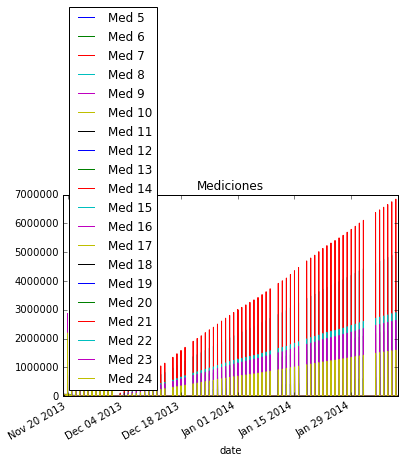

In [98]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i, group in df_txt.groupby('medidor'):
    group.plot(x='date', y='value', title=str('Mediciones'), label="Med %i" % i, ax=ax)

### Tranponiendo la matriz

In [24]:
df_txt.T

,0,1,2,3,4,5,6,7,8,9,...,129711,129712,129713,129714,129715,129716,129717,129718,129719,129720
medidor,8,15,16,17,18,20,6,5,6,7,...,15,16,19,20,17,18,11,12,23,24
date,2013-11-28 11:00:00,2013-11-28 11:00:00,2013-11-28 11:00:00,2013-11-28 11:00:00,2013-11-28 11:00:00,2013-12-01 09:30:00,2013-12-05 15:45:00,2013-11-18 22:15:00,2013-11-18 22:15:00,2013-11-18 22:15:00,...,2014-02-09 12:30:00,2014-02-09 12:30:00,2014-02-09 12:30:00,2014-02-09 12:30:00,2014-02-09 12:30:00,2014-02-09 12:30:00,2014-02-09 12:30:00,2014-02-09 12:30:00,2014-02-09 12:45:00,2014-02-09 12:45:00
value,0,692,367,0,0,71,0,29705,15364,41482,...,616,309,199,104,0,0,0,0,338,227
nueva_col,0,1,2,3,4,5,6,7,8,9,...,129711,129712,129713,129714,129715,129716,129717,129718,129719,129720


In [47]:
df_txt.values

array([[8, Timestamp('2013-11-28 11:00:00'), 0, 0],
       [15, Timestamp('2013-11-28 11:00:00'), 692, 1],
       [16, Timestamp('2013-11-28 11:00:00'), 367, 2],
       ..., 
       [12, Timestamp('2014-02-09 12:30:00'), 0, 129718],
       [23, Timestamp('2014-02-09 12:45:00'), 338, 129719],
       [24, Timestamp('2014-02-09 12:45:00'), 227, 129720]], dtype=object)

### Reordenando

In [49]:
df_txt.reindex(columns=['medidor', 'date', 'value'])

,medidor,date,value
0,8,2013-11-28 11:00:00,0
1,15,2013-11-28 11:00:00,692
2,16,2013-11-28 11:00:00,367
3,17,2013-11-28 11:00:00,0
4,18,2013-11-28 11:00:00,0
5,20,2013-12-01 09:30:00,71
6,6,2013-12-05 15:45:00,0
7,5,2013-11-18 22:15:00,29705
8,6,2013-11-18 22:15:00,15364
9,7,2013-11-18 22:15:00,41482


### Borrando columnas

In [51]:
df_txt.drop(['value'], axis=1)

,medidor,date,nueva_col
0,8,2013-11-28 11:00:00,0
1,15,2013-11-28 11:00:00,1
2,16,2013-11-28 11:00:00,2
3,17,2013-11-28 11:00:00,3
4,18,2013-11-28 11:00:00,4
5,20,2013-12-01 09:30:00,5
6,6,2013-12-05 15:45:00,6
7,5,2013-11-18 22:15:00,7
8,6,2013-11-18 22:15:00,8
9,7,2013-11-18 22:15:00,9


### Creando un dataframe a partir de un arreglo de numpy

In [55]:
df1 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bcd')) # También se puede columns=['b', 'd', 'e']
df1


,b,c,d
0,0.0,1.0,2.0
1,3.0,4.0,5.0
2,6.0,7.0,8.0
3,9.0,10.0,11.0


In [56]:
df2 = df1.copy()
suma_nan = df1 + df2
suma_nan

,b,c,d
0,0.0,2.0,4.0
1,6.0,8.0,10.0
2,12.0,14.0,16.0
3,18.0,20.0,22.0


In [57]:
df1.add(df2, fill_value=0) #cambiar el cero para ver como afecta a las funciones

,b,c,d
0,0.0,2.0,4.0
1,6.0,8.0,10.0
2,12.0,14.0,16.0
3,18.0,20.0,22.0


In [58]:
df1.div(df2, fill_value=1)

,b,c,d
0,NaN,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0


In [59]:
df1.apply(lambda x: x + 1)

,b,c,d
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,10.0,11.0,12.0


In [60]:
def mi_incremento(x):
    return x + 1

df1['b'].apply(mi_incremento)

0     1.0
1     4.0
2     7.0
3    10.0
Name: b, dtype: float64

#### Ordenando y 'Rankeando' en Pandas

In [61]:
df1.sort_index(ascending=False, axis=1) # ver como cambia el orden cambiando axis

,d,c,b
0,2.0,1.0,0.0
1,5.0,4.0,3.0
2,8.0,7.0,6.0
3,11.0,10.0,9.0


In [62]:
df1['b'].sort_values()

0    0.0
1    3.0
2    6.0
3    9.0
Name: b, dtype: float64

In [63]:
df1.rank(method='max', ascending=False) #method puede ser average, min, max o first
#df1

,b,c,d
0,4.0,4.0,4.0
1,3.0,3.0,3.0
2,2.0,2.0,2.0
3,1.0,1.0,1.0


#### Obteniendo información de nuestros DataFrames

In [64]:
df_txt.describe()

,medidor,value,nueva_col
count,129721.000000,1.297210e+05,129721.000000
mean,14.825263,7.426511e+03,64860.000000
std,6.074758,1.362647e+05,37447.371472
min,5.000000,0.000000e+00,0.000000
25%,9.000000,0.000000e+00,32430.000000
50%,16.000000,0.000000e+00,64860.000000
75%,20.000000,3.440000e+02,97290.000000
max,24.000000,6.842516e+06,129720.000000


In [65]:
df_txt['value'].pct_change()

0              NaN
1              inf
2        -0.469653
3        -1.000000
4              NaN
5              inf
6        -1.000000
7              inf
8        -0.482781
9         1.699948
10        0.265296
11       -1.000000
12             NaN
13             inf
14       -0.202264
15       -1.000000
16             NaN
17             inf
18        0.413730
19        1.040968
20       -0.354573
21       -1.000000
22             NaN
23             inf
24       -0.214306
25       -1.000000
26             NaN
27             inf
28        0.449929
29       -0.172111
            ...   
129691   -0.464286
129692   -1.000000
129693         NaN
129694         NaN
129695         NaN
129696         NaN
129697         NaN
129698         NaN
129699         NaN
129700         NaN
129701         inf
129702   -0.491639
129703   -0.384868
129704   -0.475936
129705   -1.000000
129706         NaN
129707         NaN
129708         NaN
129709         NaN
129710         NaN
129711         inf
129712   -0.

In [66]:
df_txt['value'].pct_change

<bound method NDFrame.pct_change of 0             0
1           692
2           367
3             0
4             0
5            71
6             0
7         29705
8         15364
9         41482
10        52487
11            0
12            0
13        22792
14        18182
15            0
16            0
17        22273
18        31488
19        64266
20        41479
21            0
22            0
23        14344
24        11270
25            0
26            0
27        20481
28        29696
29        24585
          ...  
129691      105
129692        0
129693        0
129694        0
129695        0
129696        0
129697        0
129698        0
129699        0
129700        0
129701      598
129702      304
129703      187
129704       98
129705        0
129706        0
129707        0
129708        0
129709        0
129710        0
129711      616
129712      309
129713      199
129714      104
129715        0
129716        0
129717        0
129718        0
129719      338
1297

In [67]:
df_txt['value'].corr(df_txt['medidor'])

0.041885128928363609

In [68]:
df_txt.corr()

,medidor,value,nueva_col
medidor,1.000000,0.041885,-0.055407
value,0.041885,1.000000,0.011713
nueva_col,-0.055407,0.011713,1.000000


#### Manejando Datos Perdidos

In [69]:
suma_nan.isnull()

,b,c,d
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


In [70]:
test_1 = suma_nan.fillna(10)
test_1

,b,c,d
0,0.0,2.0,4.0
1,6.0,8.0,10.0
2,12.0,14.0,16.0
3,18.0,20.0,22.0


In [71]:
test_2 = suma_nan.interpolate(method='linear', axis=1) #cambiar axis y ver que sucede
test_2

,b,c,d
0,0.0,2.0,4.0
1,6.0,8.0,10.0
2,12.0,14.0,16.0
3,18.0,20.0,22.0


In [72]:
suma_nan.interpolate?

#### Merge de DataFrames en Pandas

In [74]:
print(test_1)
print(test_2)
merged = pd.merge(test_1, test_2, on='d', how='outer')
merged
#left: use only keys from left frame (SQL: left outer join)
#right: use only keys from right frame (SQL: right outer join)
#outer: use union of keys from both frames (SQL: full outer join)
#inner: use intersection of keys from both frames (SQL: inner join)

      b     c     d
0   0.0   2.0   4.0
1   6.0   8.0  10.0
2  12.0  14.0  16.0
3  18.0  20.0  22.0
      b     c     d
0   0.0   2.0   4.0
1   6.0   8.0  10.0
2  12.0  14.0  16.0
3  18.0  20.0  22.0


,b_x,c_x,d,b_y,c_y
0,0.0,2.0,4.0,0.0,2.0
1,6.0,8.0,10.0,6.0,8.0
2,12.0,14.0,16.0,12.0,14.0
3,18.0,20.0,22.0,18.0,20.0


In [76]:
merged = pd.merge(test_1, test_2, on=['d', 'b', 'c', ], how='inner')
merged


,b,c,d
0,0.0,2.0,4.0
1,6.0,8.0,10.0
2,12.0,14.0,16.0
3,18.0,20.0,22.0


In [78]:
merged = pd.merge(test_1, test_2, on=['d', 'b', 'c', ], how='outer')
merged

,b,c,d
0,0.0,2.0,4.0
1,6.0,8.0,10.0
2,12.0,14.0,16.0
3,18.0,20.0,22.0


In [80]:
mi_serie_df = mi_serie_med.to_frame()
mi_serie_df.columns = ['date']
merged = pd.merge(df_txt, mi_serie_df, on='date', how='outer')
merged
print(mi_serie_df.count())
print(df_txt.count())
print(merged.count())


date    37153
dtype: int64
medidor      129721
date         129721
value        129721
nueva_col    129721
dtype: int64
medidor      129721
date         159589
value        129721
nueva_col    129721
dtype: int64


In [81]:
merged_inter = merged.interpolate()
merged_inter.count()


medidor      159589
date         159589
value        159589
nueva_col    159589
dtype: int64

In [82]:
pd.concat([df_txt['date'], df_other_excel['Evento']], axis=1) #notar que ocurre al cambiar el axis

,date,Evento
0,2013-11-28 11:00:00,ATENCION MEDICA EN DOMICILIOS
1,2013-11-28 11:00:00,ACCIDENTE DE TRANSITO
2,2013-11-28 11:00:00,ACCIDENTE DE TRANSITO
3,2013-11-28 11:00:00,ATENCION MEDICA EN VIA PUBLICA
4,2013-11-28 11:00:00,ACCIDENTE DE TRANSITO
5,2013-12-01 09:30:00,ATENCION MEDICA EN DOMICILIOS
6,2013-12-05 15:45:00,ATENCION MEDICA EN VIA PUBLICA
7,2013-11-18 22:15:00,ATENCION MEDICA EN DOMICILIOS
8,2013-11-18 22:15:00,ATENCION MEDICA EN VIA PUBLICA
9,2013-11-18 22:15:00,ATENCION MEDICA EN VIA PUBLICA


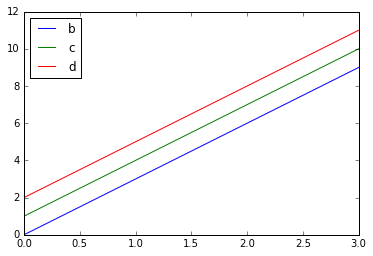

In [86]:
%matplotlib inline
df1.plot()

# [Accediendo a base de datos](https://github.com/celiacintas/dss_practica/blob/master/ipynb/DBs%20and%20Pandas.ipynb)

In [84]:
from IPython.display import YouTubeVideo

# Un ejemplo de Analisis de datos ([Julia Evans](http://jvns.ca/))

Ejemplo con datos abiertos de contadores de bicicletas, en Canada.

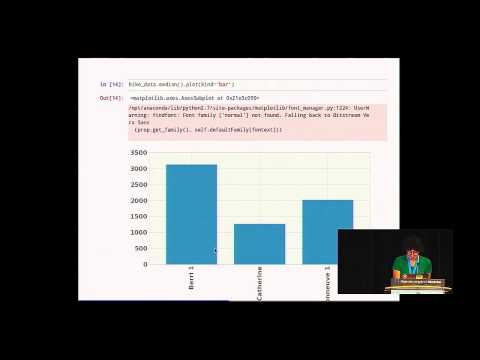

In [104]:
YouTubeVideo('rEalbu8UGeo', width='100%', height='400px')